In [15]:
import BLSTM_ATT
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 所有数据的第0号作为训练数据，其余作为测试数据

In [16]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
TrainData,TestData={},{}
for k in data.keys():
    if '.csv0' in k:
        TrainData[k]=data[k]
    else:
        TestData[k]=data[k]

#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        xtrain.append(TrainData[k][i:i+step,1:TrainData[k].shape[1]-4].tolist())
        ytrain.append(TrainData[k][i+1+step,[-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = Variable(torch.FloatTensor(xtrain))
ytrain = Variable(torch.FloatTensor(ytrain))

# Attention

## 训练

Net(
  (encoder): LSTM(12, 50, num_layers=4, batch_first=True, bidirectional=True)
  (decoder): Linear(in_features=100, out_features=4, bias=True)
)


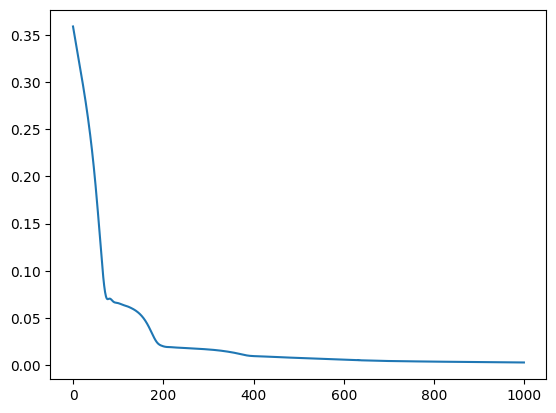

In [17]:
param={
    'embedding_dim':xtrain.shape[2], 
    'num_hiddens':100, 
    'windowsize':xtrain.shape[1],
    'num_layers':4,
    'output_dim':ytrain.shape[1], 
    'learning_rate':0.0001,
    'opt':'Adam',
    }

net = BLSTM_ATT.Net(param)
#net.model = torch.load('./model/BLSTM_ATT')
print(net)
optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
loss_func = torch.nn.MSELoss()
mse=[]
for t in range(1000):
    output = net(xtrain)
    loss = loss_func(output,ytrain)
    mse.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
torch.save(net,'./model/BLSTM_ATT')  
plt.plot(mse)

# 训练并保存训练过程图

In [18]:
net_tem = BLSTM_ATT.Net(param)
#net.model = torch.load('./model/BLSTM_ATT')
print(net_tem)
optimizer = torch.optim.Adam(net_tem.parameters(),lr = param['learning_rate'])
loss_func = torch.nn.MSELoss()
mse,vmse=[],[]
indt, indv = [i for i in range(int(xtrain.shape[0]*0.7))], [i for i in range(int(xtrain.shape[0]*0.7),int(xtrain.shape[0]))]#[np.abs(int(i)) for i in (np.random.randn(int(x.shape[0]*0.7))*x.shape[0])]
xt, yt = xtrain[indt], ytrain[indt]
xv, yv = xtrain[indv], ytrain[indv]
for t in range(1000):
    output = net_tem(xtrain)
    loss = loss_func(output,ytrain)
    
    vp = net_tem(xv)
    lossv = loss_func(vp,yv)
        
    mse.append(loss.detach().numpy())
    vmse.append(lossv.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Net(
  (encoder): LSTM(12, 50, num_layers=4, batch_first=True, bidirectional=True)
  (decoder): Linear(in_features=100, out_features=4, bias=True)
)


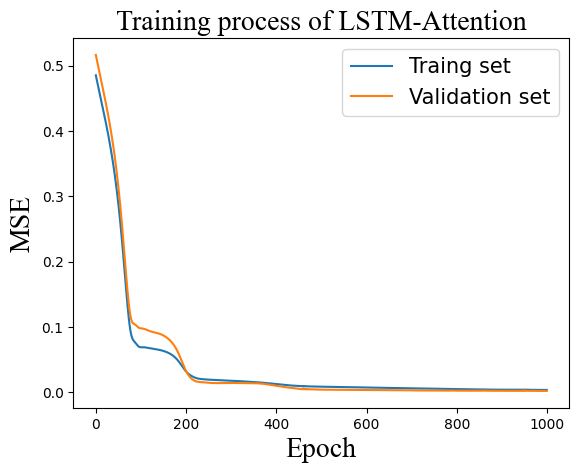

In [19]:
font1={'family':'Times New Roman','weight':'normal','size':20}
font2={'family':'Times New Roman','weight':'normal','size':10}

plt.plot(mse,label='Traing set')
plt.plot(vmse,label='Validation set')
plt.title('Training process of LSTM-Attention',font=font1)
plt.xlabel('Epoch',font=font1)
plt.ylabel('MSE',font=font1)
plt.legend(prop = {'size':15})
plt.savefig('./fig7-c.tif',bbox_inches = 'tight',dpi=200)

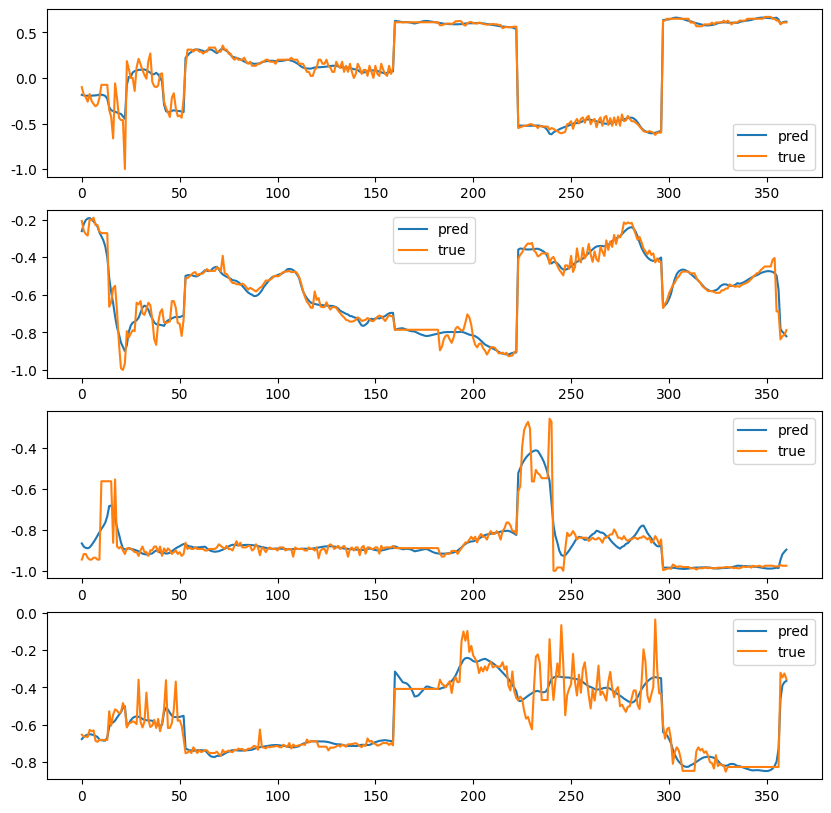

In [20]:
yp = net(xtrain)
fig,ax=plt.subplots(4,1,figsize=(10,10))
for i in range(4):
    ax[i].plot(yp.detach().numpy()[:,i],label='pred')
    ax[i].plot(ytrain.detach().numpy()[:,i],label='true')
    ax[i].legend()

## 测试

In [21]:
for f in TestData.keys():
    step=20
    xtest,ytest=[],[]
    for i in range(TestData[f].shape[0]-step-1):
        xtest.append(TestData[f][i:i+step,1:TestData[f].shape[1]-4].tolist())
        ytest.append(TestData[f][i+1+step,[-4,-3,-2,-1]].tolist())
    xtest = Variable(torch.FloatTensor(xtest))
    ytest = Variable(torch.FloatTensor(ytest))
    print(xtest.shape,f)
    yp = net(xtest)
    #mse = np.sqrt(np.mean(np.square(y1.detach().numpy()-yp.detach().numpy())))
    pd.DataFrame(yp.detach().numpy()).to_csv('./results/BLSTM_ATT/results_'+f)
    
    os.chdir(os.path.pardir)
    pd.DataFrame(yp.detach().numpy()).to_csv('./Step4_Compare/results_p/BLSTM_ATT/results_'+f)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step3_DNN')

torch.Size([92, 20, 12]) 80.csv1
torch.Size([425, 20, 12]) 80.csv2
torch.Size([414, 20, 12]) 80.csv3
torch.Size([11, 20, 12]) 80.csv4
torch.Size([648, 20, 12]) 80.csv5
torch.Size([209, 20, 12]) 80.csv6
torch.Size([350, 20, 12]) 80.csv7
torch.Size([527, 20, 12]) 80.csv8
torch.Size([42, 20, 12]) 80.csv9
torch.Size([784, 20, 12]) 80.csv10
torch.Size([188, 20, 12]) 80.csv11
torch.Size([286, 20, 12]) 80.csv12
torch.Size([209, 20, 12]) 80.csv13
torch.Size([358, 20, 12]) 56.csv1
torch.Size([179, 20, 12]) 56.csv2
torch.Size([241, 20, 12]) 56.csv3
torch.Size([565, 20, 12]) 56.csv4
torch.Size([627, 20, 12]) 56.csv5
torch.Size([368, 20, 12]) 56.csv6
torch.Size([449, 20, 12]) 56.csv7
torch.Size([245, 20, 12]) 56.csv8
torch.Size([456, 20, 12]) 56.csv9
torch.Size([560, 20, 12]) 56.csv10
torch.Size([444, 20, 12]) 56.csv11
torch.Size([191, 20, 12]) 56.csv12
torch.Size([223, 20, 12]) 56.csv13
torch.Size([52, 20, 12]) 118.csv1
torch.Size([317, 20, 12]) 118.csv2
torch.Size([337, 20, 12]) 118.csv3
torch.S